In [1]:
from basereduce.prompt_generation import LMPromptGenerator
from basereduce.image_generation import StableDiffusionImageGenerator, StableDiffusionTurboImageGenerator
from basereduce.dataset_annotation import OWLv2Annotator

import matplotlib.pyplot as plt
import torch
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np


/home/paperspace/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-12-07 00:15:43.837172: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


## Prompt generation

In [2]:
object_names = ["aeroplane", "bicycle", "bird", "boat"]
prompt_generator = LMPromptGenerator(
    class_names=object_names, prompts_number=10
)

Loading language model...


Loading checkpoint shards: 100%|██████████████████| 2/2 [00:08<00:00,  4.33s/it]


Done!


In [3]:
generated_prompts = prompt_generator.generate_prompts()
print(generated_prompts)

Generating prompts: 100%|███████████████████████| 10/10 [00:49<00:00,  4.93s/it]

[(['aeroplane', 'boat', 'bicycle'], 'A photo of a bicycle, boat, and aeroplane intertwined in the sky, symbolizing the freedom, speed, and versatility of different modes of transportation.'), (['bicycle'], 'A photo of bicycles scattered on a trail, evoking the sense of adventure and freedom of exploring nature.'), (['aeroplane'], 'A photo of an aeroplane, soaring over a picturesque cityscape at sunset, casting a golden glow on the landscape below.'), (['aeroplane', 'bird', 'bicycle'], 'A photo of a bicycle and a bird flying alongside an aeroplane above a pastoral countryside. The bicycle rider watches in awe as the aeroplane soars overhead, while the bird joins them on their adventure through the open skies.'), (['aeroplane'], 'A photo of aeroplane taking off with a flock of birds soaring alongside it.'), (['bicycle'], 'A photo of bicycles along a scenic trail, creating a sense of adventure and exploration.'), (['aeroplane'], 'A photo of an aeroplane soaring over a field of wheat, capt

In [4]:
prompt_generator.release(empty_cuda_cache=True)

## Image generation

In [5]:
image_generator = StableDiffusionTurboImageGenerator(
    seed=42.0,
)

The config attributes {'feature_extractor': [None, None], 'image_encoder': [None, None]} were passed to StableDiffusionXLPipeline, but are not expected and will be ignored. Please verify your model_index.json configuration file.
Keyword arguments {'feature_extractor': [None, None], 'image_encoder': [None, None]} are not expected by StableDiffusionXLPipeline and will be ignored.
Loading pipeline components...: 100%|█████████████| 7/7 [00:01<00:00,  4.06it/s]


In [6]:
prompts = [p[1] for p in generated_prompts]
prompt_objects = [p[0] for p in generated_prompts]

In [7]:
generated_images = list(image_generator.generate_images(prompts))

Generating images:   0%|                                 | 0/10 [00:00<?, ?it/s]

A photo of a bicycle, boat, and aeroplane intertwined in the sky, symbolizing the freedom, speed, and versatility of different modes of transportation., hd, 8k, highly detailed



Generating images:  10%|██▌                      | 1/10 [00:07<01:07,  7.51s/it]

A photo of bicycles scattered on a trail, evoking the sense of adventure and freedom of exploring nature., hd, 8k, highly detailed



Generating images:  20%|█████                    | 2/10 [00:10<00:37,  4.64s/it]

A photo of an aeroplane, soaring over a picturesque cityscape at sunset, casting a golden glow on the landscape below., hd, 8k, highly detailed



Generating images:  30%|███████▌                 | 3/10 [00:12<00:24,  3.49s/it]

A photo of a bicycle and a bird flying alongside an aeroplane above a pastoral countryside. The bicycle rider watches in awe as the aeroplane soars overhead, while the bird joins them on their adventure through the open skies., hd, 8k, highly detailed



Generating images:  40%|██████████               | 4/10 [00:14<00:18,  3.01s/it]

A photo of aeroplane taking off with a flock of birds soaring alongside it., hd, 8k, highly detailed



Generating images:  50%|████████████▌            | 5/10 [00:16<00:13,  2.72s/it]

A photo of bicycles along a scenic trail, creating a sense of adventure and exploration., hd, 8k, highly detailed



Generating images:  60%|███████████████          | 6/10 [00:18<00:10,  2.54s/it]

A photo of an aeroplane soaring over a field of wheat, capturing the beauty of nature as viewed from above., hd, 8k, highly detailed



Generating images:  70%|█████████████████▌       | 7/10 [00:21<00:07,  2.42s/it]

A photo of a bird soaring above a boat sailing beside a bicycle on a serene river., hd, 8k, highly detailed



Generating images:  80%|████████████████████     | 8/10 [00:23<00:04,  2.35s/it]

A photo of boat sailing through calm blue waters surrounded by white-capped waves, with a majestic ocean liner in the distance. The clear sky and the vast expanse of water create a serene and peaceful ambiance, suggesting a sense of adventure and discovery., hd, 8k, highly detailed



Generating images:  90%|██████████████████████▌  | 9/10 [00:25<00:02,  2.29s/it]

A photo of a bird soaring past an aeroplane cruising in the sky above the ocean, with a boat bobbing in the distance., hd, 8k, highly detailed



Generating images: 100%|████████████████████████| 10/10 [00:27<00:00,  2.77s/it]


(['aeroplane', 'boat', 'bicycle'], 'A photo of a bicycle, boat, and aeroplane intertwined in the sky, symbolizing the freedom, speed, and versatility of different modes of transportation.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x7F379D005220>


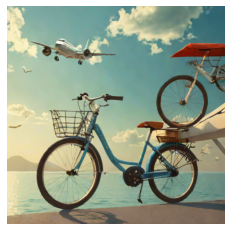

(['bicycle'], 'A photo of bicycles scattered on a trail, evoking the sense of adventure and freedom of exploring nature.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x7F379D05AFA0>


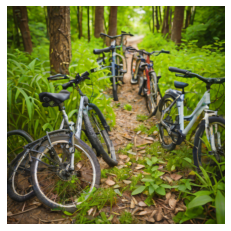

(['aeroplane'], 'A photo of an aeroplane, soaring over a picturesque cityscape at sunset, casting a golden glow on the landscape below.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x7F379D005280>


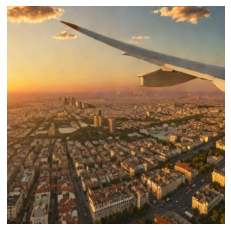

(['aeroplane', 'bird', 'bicycle'], 'A photo of a bicycle and a bird flying alongside an aeroplane above a pastoral countryside. The bicycle rider watches in awe as the aeroplane soars overhead, while the bird joins them on their adventure through the open skies.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x7F379D005430>


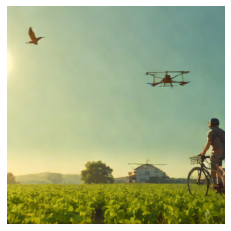

(['aeroplane'], 'A photo of aeroplane taking off with a flock of birds soaring alongside it.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x7F379D005850>


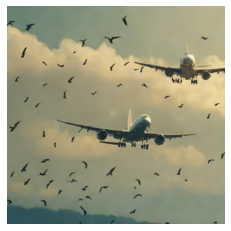

(['bicycle'], 'A photo of bicycles along a scenic trail, creating a sense of adventure and exploration.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x7F379D0054C0>


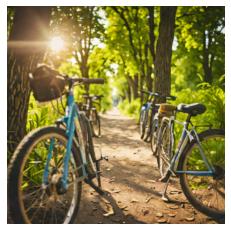

(['aeroplane'], 'A photo of an aeroplane soaring over a field of wheat, capturing the beauty of nature as viewed from above.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x7F379D005340>


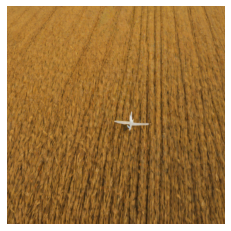

(['bicycle', 'bird', 'boat'], 'A photo of a bird soaring above a boat sailing beside a bicycle on a serene river.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x7F379D0050A0>


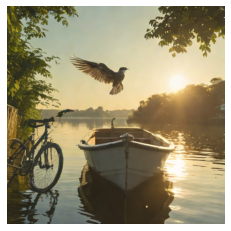

(['boat'], 'A photo of boat sailing through calm blue waters surrounded by white-capped waves, with a majestic ocean liner in the distance. The clear sky and the vast expanse of water create a serene and peaceful ambiance, suggesting a sense of adventure and discovery.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x7F379D0051C0>


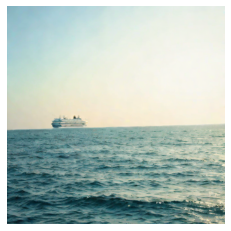

(['bird', 'aeroplane', 'boat'], 'A photo of a bird soaring past an aeroplane cruising in the sky above the ocean, with a boat bobbing in the distance.')
<PIL.Image.Image image mode=RGB size=512x512 at 0x7F379D005910>


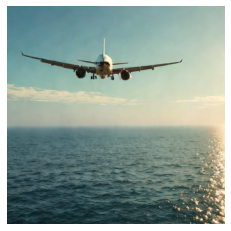

In [8]:
for img, prompt in zip(generated_images, generated_prompts):
    print(prompt)
    plt.imshow(img)
    print(img)
    plt.axis("off")  # Hide the axis
    plt.show()


In [9]:
image_generator.release(empty_cuda_cache=True)

In [10]:
annotator = OWLv2Annotator(
    seed=42,
    device="cuda",  # Use "cuda" for GPU or "cpu" for CPU
)

Box: [      72.29      204.29      452.69      473.93], Score: 0.6042130589485168, Label: bicycle
Box: [     50.364      73.791      258.79      138.32], Score: 0.5969702005386353, Label: aeroplane
Box: [     353.79      86.062      511.23      284.06], Score: 0.44059887528419495, Label: bicycle
Box: [     327.28      210.32      512.69       336.7], Score: 0.24797247350215912, Label: boat


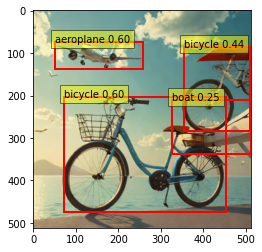

Box: [     1.6799      147.14      261.48      487.72], Score: 0.6033069491386414, Label: bicycle
Box: [     287.99      97.464      380.81      255.55], Score: 0.5887662768363953, Label: bicycle
Box: [     201.36        56.9      291.29      222.34], Score: 0.5818987488746643, Label: bicycle
Box: [     342.76      138.78      510.46      424.41], Score: 0.5557072162628174, Label: bicycle
Box: [   -0.12537      289.03      74.393      458.63], Score: 0.26166173815727234, Label: bicycle
Box: [     262.17      69.732      315.77      185.81], Score: 0.20618078112602234, Label: bicycle


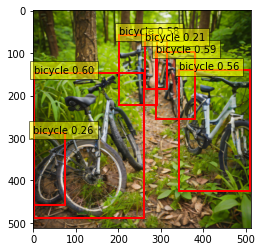

Box: [     125.04      33.414      513.35      210.31], Score: 0.7409043908119202, Label: aeroplane


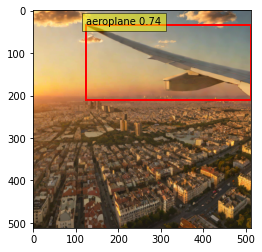

Box: [     423.82      347.62      509.29      449.41], Score: 0.716081976890564, Label: bicycle
Box: [     42.942      48.099      87.499      91.175], Score: 0.6292577981948853, Label: bird
Box: [     324.71      151.03      431.96      191.69], Score: 0.3936659097671509, Label: aeroplane


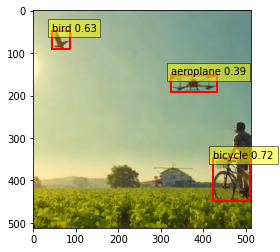

Box: [      117.7      239.12      448.86      333.59], Score: 0.6781960725784302, Label: aeroplane
Box: [     299.57      86.996      511.44      180.86], Score: 0.6386958956718445, Label: aeroplane


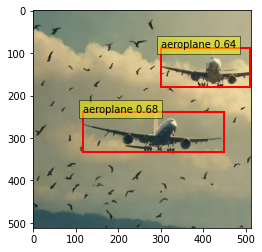

Box: [     4.9924      150.75      239.61      515.64], Score: 0.626121997833252, Label: bicycle
Box: [     320.32      199.53      402.75       369.7], Score: 0.5644250512123108, Label: bicycle
Box: [     169.58      205.81       225.7      309.22], Score: 0.5544850826263428, Label: bicycle
Box: [     343.77      220.89      511.18       504.2], Score: 0.5247867703437805, Label: bicycle


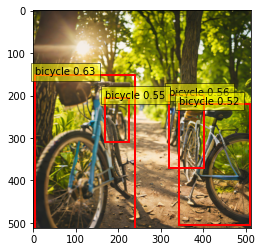

Box: [     250.52       247.2      337.08      292.16], Score: 0.6308673620223999, Label: aeroplane


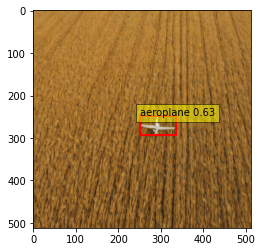

Box: [     165.11      273.36      396.97      419.99], Score: 0.7731189131736755, Label: boat
Box: [    0.50989       245.4       144.3      443.13], Score: 0.753702700138092, Label: bicycle
Box: [      144.8         114      289.59       209.6], Score: 0.6796709895133972, Label: bird
Box: [     471.41      228.23      511.99      279.93], Score: 0.33839482069015503, Label: boat
Box: [     4.3637      427.95      121.08      511.76], Score: 0.23480217158794403, Label: bicycle
Box: [     116.06      241.31      156.85      260.52], Score: 0.20752765238285065, Label: bird


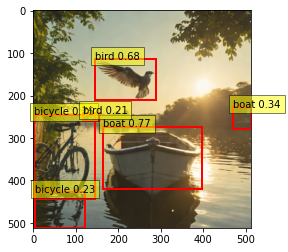

Box: [     104.04       255.5      190.08      286.17], Score: 0.6249511241912842, Label: boat


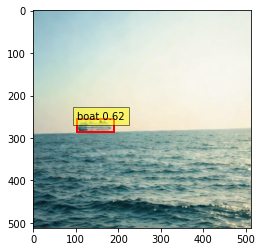

Box: [     27.227      73.291      414.77      175.35], Score: 0.802710235118866, Label: aeroplane


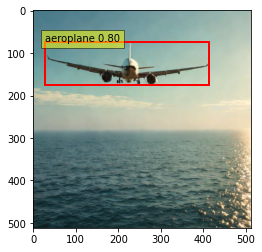

In [11]:
boxes_list = []
scores_list = []
labels_list = []


for image, prompt_objs in zip(generated_images, prompt_objects):
    # Define prompts to guide the detection
    prompts = prompt_objs

    # Perform object detection
    boxes, scores, labels = annotator.annotate(image, prompts, conf_threshold=0.2, use_tta=True)

    # Convert to numpy arrays
    if not isinstance(boxes, np.ndarray):
        boxes = boxes.detach().cpu().numpy()
    if not isinstance(scores, np.ndarray):
        scores = scores.detach().cpu().numpy()
    if not isinstance(labels, np.ndarray):
        labels = labels.detach().cpu().numpy()

    # Process the results
    for box, score, label in zip(boxes, scores, labels):
        if isinstance(label, np.int64):
            print(f"Box: {box}, Score: {score}, Label: {prompts[label]}")
        else:
            print(f"Box: {box}, Score: {score}, Label: {label}")


    fig, ax = plt.subplots(1)
    ax.imshow(image)

    # Iterate over each detection
    for box, score, label in zip(boxes, scores, labels):
        # Each box is (x1, y1, x2, y2)
        x1, y1, x2, y2 = box
        width, height = x2 - x1, y2 - y1
        rect = patches.Rectangle(
            (x1, y1), width, height, linewidth=2, edgecolor="r", facecolor="none"
        )
        ax.add_patch(rect)

        if isinstance(label, np.int64):
            label = prompts[label]

        plt.text(
            x1,
            y1,
            f"{label} {score:.2f}",
            bbox=dict(facecolor="yellow", alpha=0.5),
        )

    plt.show()

## Dataset creation and saving (WIP)

In [1]:
!python3 --version

Python 3.10.13


In [23]:
!pip uninstall albumentations -y

Found existing installation: albumentations 1.3.1
Uninstalling albumentations-1.3.1:
  Successfully uninstalled albumentations-1.3.1


In [26]:
!pip install git+https://github.com/i-aki-y/albumentations.git@c137e2 --no-cache-dir

  Cloning https://github.com/i-aki-y/albumentations.git (to revision c137e2) to /tmp/pip-req-build-duypccza
  Running command git clone --filter=blob:none --quiet https://github.com/i-aki-y/albumentations.git /tmp/pip-req-build-duypccza
  Running command git checkout -q c137e2
  Resolved https://github.com/i-aki-y/albumentations.git to commit c137e2
  Preparing metadata (setup.py) ... done

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import glob, json, os
import numpy as np
import cv2
from copy import deepcopy
from tqdm import tqdm
import matplotlib.pyplot as plt

from luxonis_ml.data import *
from luxonis_ml.enums import LabelType

In [18]:
dataset_name = "basereduce_test1"
#if LuxonisDataset.exists(dataset_name):
    #print("Dataset exists")
dataset = LuxonisDataset(dataset_name)
dataset.delete_dataset()

In [4]:
save_dir = 'generated_images'

In [41]:
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save images and create paths
img_paths = []
for i, img in enumerate(generated_images):
    path = os.path.join(save_dir, f'image_{i}.jpg')
    img.save(path)
    img_paths.append(path)

In [66]:
def save_to_json(data, filename):
    with open(filename, 'w') as file:
        json.dump(data, file)

# Save boxes_list and labels_list as JSON files
save_to_json([sub.tolist() for sub in boxes_list], os.path.join(save_dir, 'boxes_list.json'))
save_to_json([sub.tolist() for sub in labels_list], os.path.join(save_dir, 'labels_list.json'))
save_to_json(object_names, os.path.join(save_dir, 'object_names.json'))

In [5]:
def load_from_json(filename):
    with open(filename, 'r') as file:
        return json.load(file)

# Load the data back into Python lists
boxes_list = load_from_json(os.path.join(save_dir, 'boxes_list.json'))
labels_list = load_from_json(os.path.join(save_dir, 'labels_list.json'))
object_names = load_from_json(os.path.join(save_dir, 'object_names.json'))

In [6]:
img_paths = []
valid_images = [".jpg",".png"]
for f in os.listdir(save_dir):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    img_paths.append(os.path.join(save_dir,f))
img_paths = sorted(img_paths)

In [7]:
def dataset_generator(img_paths, boxes_list, labels_list, label_map):
    
    for path, bboxes, labels in tqdm(zip(img_paths, boxes_list, labels_list)):
        img = cv2.imread(path)
        print(path)
        height, width, _ = img.shape
        
        for bbox, label in zip(bboxes, labels):
            # COCO-specific conversion for bounding boxes
            x, y, w, h = bbox
            label = label_map[label]
            yield {
                "file": path,
                "class": label,
                "type": "box",
                "value": [x/width, y/height, w/width, h/height]
            }

In [19]:
dataset = LuxonisDataset(dataset_name)
dataset.set_classes(object_names)
dataset.add(lambda: dataset_generator(img_paths, boxes_list, labels_list, object_names))


10it [00:00, 105.42it/s]


generated_images/image_0.jpg
generated_images/image_1.jpg
generated_images/image_2.jpg
generated_images/image_3.jpg
generated_images/image_4.jpg
generated_images/image_5.jpg
generated_images/image_6.jpg
generated_images/image_7.jpg
generated_images/image_8.jpg
generated_images/image_9.jpg
Generating UUIDs...
Took 0.009219646453857422 seconds
Saving annotations...


100%|████████████████████████████████████████| 39/39 [00:00<00:00, 48453.16it/s]

Took 0.002605438232421875 seconds


In [20]:
dataset.path

'/home/paperspace/luxonis/luxonis-ml/src/luxonis_ml/data/offline/datasets/basereduce_test1'

In [21]:
dataset.make_splits()


Sample boxes tensor
[[0.         0.58364528 0.12363181 0.95814556 0.20457885]
 [0.         0.63494682 0.26231399 0.98104501 0.35477176]
 [0.         0.6166271  0.38959962 0.75450325 0.44275373]
 [0.         0.74444896 0.51240307 0.86008853 0.56783444]]

{<LabelType.BOUNDINGBOX: 'boxes'>: array([[0.        , 0.58364528, 0.12363181, 0.95814556, 0.20457885],
       [0.        , 0.63494682, 0.26231399, 0.98104501, 0.35477176],
       [0.        , 0.6166271 , 0.38959962, 0.75450325, 0.44275373],
       [0.        , 0.74444896, 0.51240307, 0.86008853, 0.56783444]])}
aeroplane
aeroplane
aeroplane
aeroplane


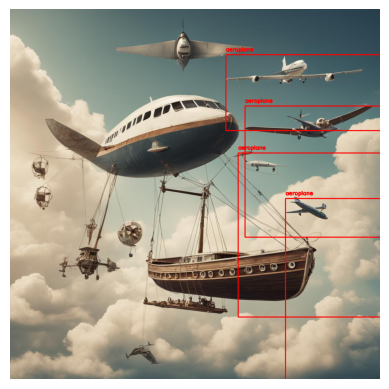

KeyError: False

In [22]:
class_names, _ = dataset.get_classes()
loader = LuxonisLoader(dataset, view="train")
for image, ann in loader:
    #cls = ann[LabelType.CLASSIFICATION]
    box = ann[LabelType.BOUNDINGBOX]
    
    #print("Sample classification tensor")
    #print(cls)
    #print()

    print("Sample boxes tensor")
    print(box)
    print()
    print(ann)


    h, w, _ = image.shape
    for b in box:
        label = class_names[int(b[0])]
        print(label)
        x_min, y_min, box_width, box_height = int(b[1]*w), int(b[2]*h), int(b[3]*w), int(b[4]*h)
        cv2.rectangle(image, (int(b[1]*w),int(b[2]*h)), (int(b[1]*w+b[3]*w),int(b[2]*h+b[4]*h)), (255,0,0), 2)
        cv2.putText(image, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    mask_viz = np.zeros((h,w,3)).astype(np.uint8)
    
    plt.imshow(image)
    plt.axis('off')  # Optional: Hide axis
    plt.show()
